In [80]:
import pandas as pd
import seaborn as sns
import igraph
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from joblib import Parallel, delayed
from tqdm import tqdm
import statsmodels.api as sm
from scipy.stats import ttest_1samp
from scipy.stats import skewnorm

#plotting stuff
from matplotlib import rcParams
rcParams['font.sans-serif'] = "Myriad Pro"

# import local functions
import os
import sys
module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)
from functions.author_fns import Author, compare_nets

%matplotlib inline

### Load data

In [81]:
cds = pd.read_csv('../data/manual_data_stats.csv', header=0)
cds.set_index('Unnamed: 0', inplace=True)

In [82]:
cds.head()

,mm,wm,mw,ww,rel_mm,rel_wm,rel_mw,rel_ww
Unnamed: 0,,,,,,,,
Max,69.800000,40.300000,28.600000,42.900000,11.400000,14.800000,19.200000,36.200000
95% CI upper bound,55.389252,20.760992,14.206905,15.765769,-3.010748,-4.739008,4.806905,9.065769
Mean,52.804490,19.192857,12.729184,13.420204,-5.595510,-6.307143,3.329184,6.720204
95% CI lower bound,50.219728,17.624722,11.251462,11.074639,-8.180272,-7.875278,1.851462,4.374639
Min,21.400000,6.670000,3.000000,1.000000,-37.000000,-18.830000,-6.400000,-5.700000


### Make plot

In [84]:
bar_color = "lightgrey"
bar_palette = ["midnightblue", "teal", "skyblue", "chocolate"]
bar_alpha = 1

# code CI how plot wants
cds.loc['95% CI upper bound',
        ['rel_mm','rel_wm','rel_mw','rel_ww']] = cds.loc[
    '95% CI upper bound',['rel_mm','rel_wm','rel_mw','rel_ww']] - cds.loc[
    'Mean', ['rel_mm','rel_wm','rel_mw','rel_ww']]
cds.loc['95% CI lower bound',
        ['rel_mm','rel_wm','rel_mw','rel_ww']] = cds.loc[
    '95% CI lower bound',['rel_mm','rel_wm','rel_mw','rel_ww']] - cds.loc[
    'Mean', ['rel_mm','rel_wm','rel_mw','rel_ww']]
cds.head()

,mm,wm,mw,ww,rel_mm,rel_wm,rel_mw,rel_ww
Unnamed: 0,,,,,,,,
Max,69.800000,40.300000,28.600000,42.900000,11.400000,14.800000,19.200000,36.200000
95% CI upper bound,55.389252,20.760992,14.206905,15.765769,2.584762,1.568135,1.477722,2.345565
Mean,52.804490,19.192857,12.729184,13.420204,-5.595510,-6.307143,3.329184,6.720204
95% CI lower bound,50.219728,17.624722,11.251462,11.074639,-2.584762,-1.568135,-1.477722,-2.345565
Min,21.400000,6.670000,3.000000,1.000000,-37.000000,-18.830000,-6.400000,-5.700000


<ipython-input-86-394d7622d99e>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks)
'MyriadPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


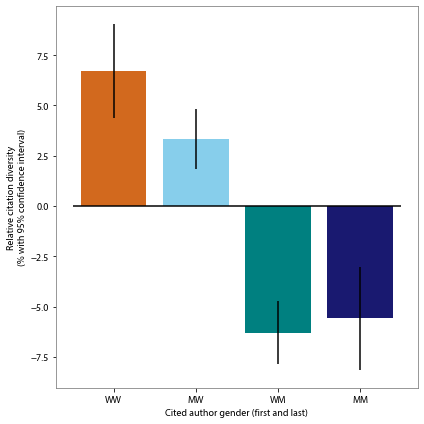

In [86]:
fig, ax = plt.subplots(figsize=(6, 6))

# plots
plt.bar(
    x=["MM", "WM", "MW", "WW"],
    height=cds.loc['Mean',['rel_mm','rel_wm','rel_mw','rel_ww']],
    yerr=[np.abs(cds.loc['95% CI lower bound',['rel_mm','rel_wm','rel_mw','rel_ww']]),
         cds.loc['95% CI upper bound',['rel_mm','rel_wm','rel_mw','rel_ww']]],
    color=bar_palette,
    alpha=bar_alpha,
)

# grid
ax.hlines(y=0, xmin=-0.5, xmax=3.5, color='k')
ax.set_axisbelow(True)

# labels
ax.set_ylabel("Relative citation diversity\n(% with 95% confidence interval)")
ticks = ["MM", "WM", "MW", "WW"]
ax.set_xticklabels(ticks)
ax.set_xlabel("Cited author gender (first and last)")
ax.invert_xaxis()

# save
plt.tight_layout()
plt.savefig("../data/img/cds.pdf")
